In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
boston_train=pd.read_csv("train (1).csv")

In [54]:
boston_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [55]:
boston_train.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [56]:
boston_train.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [57]:
boston_train=boston_train.drop_duplicates()

In [58]:
boston_train.shape

(400, 15)

In [59]:
boston_train=boston_train.drop(columns="ID")

In [60]:
def outliers(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  upper=q3+(1.5*iqr)
  lower= q1-(1.5*iqr)
  return lower,upper


In [61]:
boston_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [62]:
boston_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [63]:
outliers(boston_train['CRIM'])

(-5.1205912499999995, 8.74183875)

In [64]:
boston_train['CRIM']=boston_train['CRIM'].clip(-5.1205912499999995, 8.74183875)

In [65]:
outliers(boston_train['ZN'])

(-18.75, 31.25)

In [66]:
boston_train['ZN']=boston_train['ZN'].clip(-18.75, 31.25)

In [67]:
outliers(boston_train["INDUS"])

(-14.325000000000006, 37.55500000000001)

In [68]:
boston_train["INDUS"]=boston_train["INDUS"].clip(-14.325, 37.555)

In [69]:
outliers(boston_train["NOX"])

(0.18650000000000005, 0.8865)

In [70]:
outliers(boston_train["RM"])

(4.763000000000002, 7.734999999999999)

In [71]:
# boston_train["RM"]=boston_train["RM"].clip(4.763, 7.734)

In [72]:
outliers(boston_train["AGE"])

(-34.80000000000001, 171.0)

In [73]:
outliers(boston_train["DIS"])

(-2.549025, 9.872775)

In [74]:
boston_train["DIS"]=boston_train["DIS"].clip(-2.549025, 9.872775)

In [75]:
outliers(boston_train["RAD"])

(-26.0, 54.0)

In [76]:
outliers(boston_train["TAX"])

(-306.5, 1249.5)

In [77]:
outliers(boston_train["PTRATIO"])

(13.199999999999998, 24.4)

In [78]:
outliers(boston_train["B"])

(345.86000000000007, 426.5399999999999)

In [79]:
outliers(boston_train["LSTAT"])

(-7.889999999999999, 31.79)

In [80]:
boston_train["LSTAT"]=boston_train["LSTAT"].clip(-7.88, 31.79)

In [81]:
outliers(boston_train["MEDV"])

(5.2500000000000036, 36.849999999999994)

In [82]:
boston_train["MEDV"]=boston_train["MEDV"].clip(5.250, 36.849)

In [83]:
boston_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.00,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.800
1,0.02875,28.00,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.000
2,1.22358,0.00,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,36.849
3,5.66637,0.00,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.400
4,0.04544,0.00,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.03615,31.25,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.900
396,0.17505,0.00,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.700
397,6.65492,0.00,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.500
398,0.13117,0.00,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.400


In [84]:
boston_test=pd.read_csv("test (1).csv")

In [85]:
boston_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [86]:
boston_test=boston_test.drop(columns="ID")

In [87]:
boston_test.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [88]:
boston_test.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [89]:
boston_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.100574,12.800000,11.984095,0.057143,0.562010,6.253181,70.469524,3.699209,9.961905,426.219048,18.472381,345.695333,12.667238
std,6.099267,25.384978,6.854823,0.233229,0.118159,0.679369,27.410123,2.017964,8.814241,164.240090,2.227041,106.976156,6.912011
min,0.013600,0.000000,1.320000,0.000000,0.392000,3.561000,6.800000,1.285200,1.000000,188.000000,12.600000,3.650000,1.730000
25%,0.100840,0.000000,6.090000,0.000000,0.449000,5.949000,47.200000,2.063500,4.000000,300.000000,16.600000,373.660000,7.120000
50%,0.290900,0.000000,9.900000,0.000000,0.544000,6.195000,78.100000,2.783100,5.000000,391.000000,19.100000,390.740000,12.260000
75%,4.261310,12.500000,18.100000,0.000000,0.624000,6.631000,94.500000,5.116700,24.000000,666.000000,20.200000,395.620000,17.160000
max,45.746100,100.000000,27.740000,1.000000,0.871000,7.929000,100.000000,9.220300,24.000000,711.000000,21.200000,396.900000,36.980000


In [90]:
outliers(boston_test["CRIM"])

(-6.139865, 10.502015)

In [91]:
boston_test["CRIM"]=boston_test["CRIM"].clip(-6.139865, 10.502015)

In [92]:
outliers(boston_test["ZN"])

(-18.75, 31.25)

In [93]:
boston_test["ZN"]=boston_test["ZN"].clip(-18.75, 31.25)

In [94]:
outliers(boston_test['LSTAT'])

(-7.939999999999999, 32.22)

In [95]:
boston_test['LSTAT']=boston_test['LSTAT'].clip(-7.939, 32.22)

In [96]:
boston_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

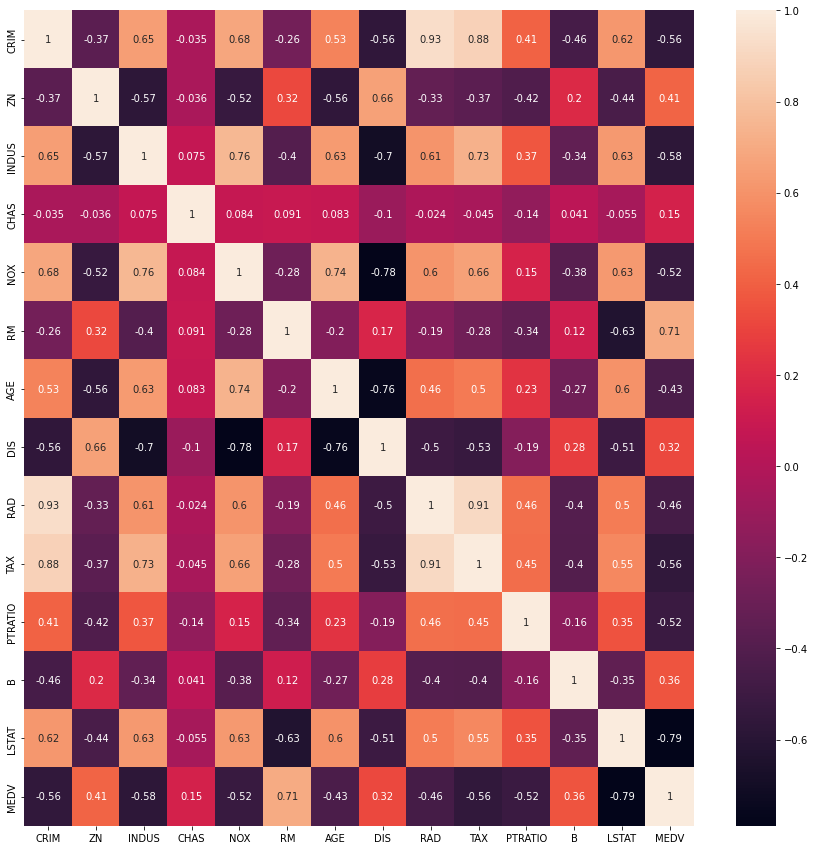

In [97]:
corr=boston_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

chas has no linear relationship with medv so we drop it


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

In [105]:
X = boston_train[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','CRIM']]
y = boston_train['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)


R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','CRIM'])
cross_val = pd.Series()

def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    cross_val[x] = np.mean(cross_val_score(reg, X_train, y_train, cv = 10))
    

model(LinearRegression())
model(Ridge())
model(Lasso())   

<ipython-input-105-77c2c2932176>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R2_score = pd.Series()
<ipython-input-105-77c2c2932176>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  intercept = pd.Series()
<ipython-input-105-77c2c2932176>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cross_val = pd.Series()


In [106]:
R2_score

LinearRegression()    0.789211
Ridge()               0.790599
Lasso()               0.699091
dtype: float64

In [107]:
intercept

LinearRegression()    34.698337
Ridge()               29.604069
Lasso()               40.191292
dtype: float64

In [108]:
df_coef

,LinearRegression(),Ridge(),Lasso()
ZN,0.036157,0.039278,0.049003
INDUS,-0.009741,-0.042055,-0.005577
NOX,-14.715009,-6.909821,-0.000000
RM,2.851175,2.843339,0.000000
AGE,-0.008634,-0.014693,0.021024
DIS,-1.092895,-0.989141,-0.271457
RAD,0.227616,0.233936,0.152211
TAX,-0.009544,-0.009953,-0.012820
PTRATIO,-0.750791,-0.673967,-0.511131
B,0.010187,0.010683,0.008390


In [109]:
cross_val

LinearRegression()    0.762052
Ridge()               0.759755
Lasso()               0.689137
dtype: float64

with all features

In [110]:
from sklearn.model_selection import train_test_split
X = boston_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston_train['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)


R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
cross_val = pd.Series()

def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    cross_val[x] = np.mean(cross_val_score(reg, X_train, y_train, cv = 10))
    
model(LinearRegression())
model(Ridge())
model(Lasso())

<ipython-input-110-4f1b96bcef20>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R2_score = pd.Series()
<ipython-input-110-4f1b96bcef20>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  intercept = pd.Series()
<ipython-input-110-4f1b96bcef20>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cross_val = pd.Series()


In [111]:
R2_score

LinearRegression()    0.788427
Ridge()               0.788778
Lasso()               0.699092
dtype: float64

In [112]:
intercept

LinearRegression()    33.972823
Ridge()               28.942430
Lasso()               40.191411
dtype: float64

In [113]:
df_coef

,LinearRegression(),Ridge(),Lasso()
CRIM,-0.257520,-0.328550,-0.000000
ZN,0.035247,0.038368,0.049001
INDUS,-0.036204,-0.067355,-0.005574
CHAS,1.902396,1.838396,0.000000
NOX,-14.593130,-6.854775,-0.000000
RM,2.807546,2.801485,0.000000
AGE,-0.010587,-0.016534,0.021024
DIS,-1.084929,-0.982236,-0.271448
RAD,0.219840,0.226358,0.152214
TAX,-0.008285,-0.008734,-0.012820


In [114]:
cross_val

LinearRegression()    0.763075
Ridge()               0.761295
Lasso()               0.689136
dtype: float64

**linear** **regression**

In [116]:
from itertools import combinations

In [119]:

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_reg = []
combo_cv_reg = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)
for i in combo_list :
    X = boston_train.loc[:,i].values
    Y = boston_train['MEDV'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    combo_r2_reg.append(reg.score(X_test, y_test))
    combo_cv_reg.append(np.mean(cross_val_score(reg, X_train, y_train, cv = 10)))
r2_reg = combo_r2_reg.index(max(combo_r2_reg))
cv_reg = combo_cv_reg.index(max(combo_cv_reg))

**Ridge**

In [120]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_rd = []
combo_cv_rd = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = boston_train.loc[:,i].values
    Y = boston_train['MEDV'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
    rd = Ridge()
    rd.fit(X_train, y_train)
    combo_r2_rd.append(rd.score(X_test, y_test))
    combo_cv_rd.append(np.mean(cross_val_score(rd, X_train, y_train, cv = 10)))
r2_rd = combo_r2_rd.index(max(combo_r2_rd))
cv_rd = combo_cv_rd.index(max(combo_cv_rd))

**lasso**

In [121]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_ls = []
combo_cv_ls = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = boston_train.loc[:,i].values
    Y = boston_train['MEDV'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
    ls = Lasso()
    ls.fit(X_train, y_train)
    combo_r2_ls.append(ls.score(X_test, y_test))
    combo_cv_ls.append(np.mean(cross_val_score(ls, X_train, y_train, cv = 10)))
r2_ls = combo_r2_ls.index(max(combo_r2_ls))
cv_ls = combo_cv_ls.index(max(combo_cv_ls))

In [122]:
print('Linear Regression')
print('R2 Score - ', combo_list[r2_reg],' : ',combo_r2_reg[r2_reg])
print('CV Score - ', combo_list[cv_reg],' : ',combo_cv_reg[cv_reg])

print('\n')

print('Ridge')
print('R2 Score - ', combo_list[r2_rd],' : ',combo_r2_rd[r2_rd])
print('CV Score - ', combo_list[cv_rd],' : ',combo_cv_rd[cv_rd])

print('\n')

print('Lasso')
print('R2 Score - ', combo_list[r2_ls],' : ',combo_r2_ls[r2_ls])
print('CV Score - ', combo_list[cv_ls],' : ',combo_cv_ls[cv_ls])

Linear Regression
R2 Score -  ('CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.8015121288889528
CV Score -  ('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7664324660396049


Ridge
R2 Score -  ('CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.8058921266074618
CV Score -  ('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7631328731228009


Lasso
R2 Score -  ('INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.706016630957721
CV Score -  ('ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.698679679688838
